# Project 2 - Predict automobile price using Machine Learning

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\win\Desktop\AutoData (1).csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
df.shape

(205, 25)

In [5]:
df.info

<bound method DataFrame.info of      symboling                      make fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
4            2                audi 100ls      gas        std       four   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 145e (sw)      gas        std       four   
201         -1               volvo 144ea      gas      turbo       four   
202         -1               volvo 244dl      gas        std       four   
203         -1                 volvo 246   diesel      turbo       four   
204         -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  .

In [6]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
print(df['fueltype'].value_counts())
print(df['aspiration'].value_counts())
print(df['doornumber'].value_counts())
print(df['carbody'].value_counts())
print(df['drivewheel'].value_counts())
print(df['enginelocation'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64


In [9]:
df.loc[df.duplicated()] #data cleaning and checking for duplicates

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
df.isnull().sum() 
# Checking for null vales (No null values)

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Exploratory Data Analysis ( EDA )
## Univariate Analysis

In [11]:
df.price.describe()#target variable is price

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

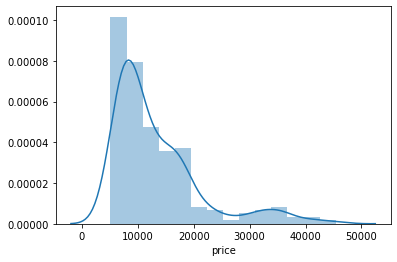

In [12]:
sns.distplot(df['price'])

Column : Symbolling

In [13]:
#symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

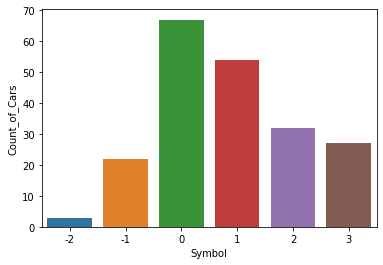

<Figure size 432x288 with 0 Axes>

In [14]:
plt1 = sns.countplot(df['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count_of_Cars')
plt.show()
plt.tight_layout()

In [15]:
df['car_company'] = df.make.str.split(' ').str.get(0).str.upper() # spilting car company and model

In [16]:
df = df.drop(['make'], axis =1) # droping make column

In [17]:
print(len('car_company'))
df.head()

11


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [18]:
#  We cansee that in the cloumn brand names,
# VOLKSWAGON has three different data as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also calles as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
df['car_company'] = df['car_company'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['car_company'] =df['car_company'].replace(['MAXDA'], 'MAZDA')
df['car_company'] =df['car_company'].replace(['PORCSHCE'], 'PORSCHE')
df['car_company'] = df['car_company'].replace(['TOYOUTA'], 'TOYOTA')

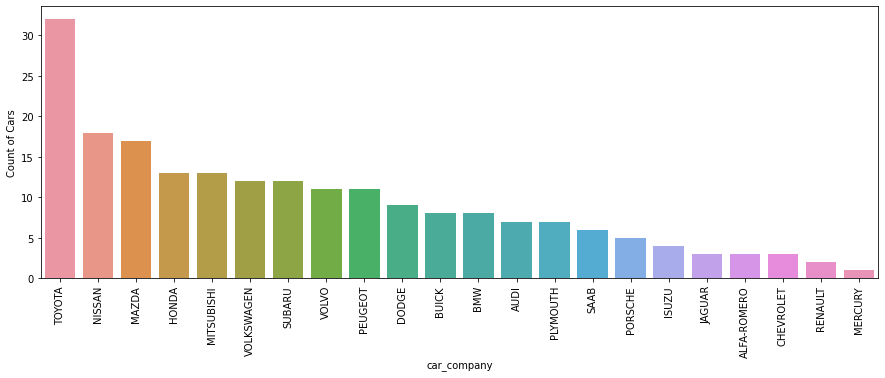

In [19]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['car_company'], order=pd.value_counts(df['car_company']).index,)
plt1.set(xlabel = 'car_company', ylabel= 'Count of Cars')
xticks(rotation=90)
plt.show()

In [20]:
df.car_company.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: car_company, dtype: object

car company

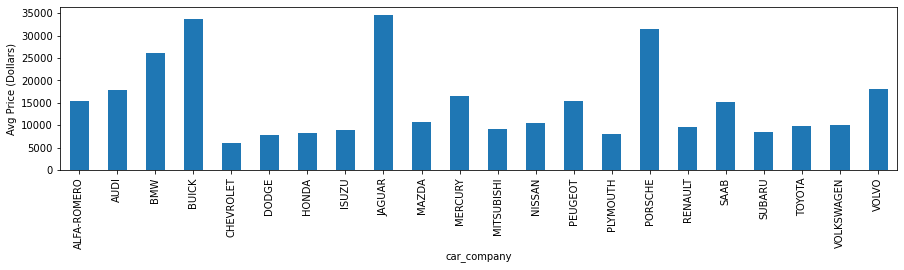

In [21]:
df_comp_avg_price = df[['car_company','price']].groupby("car_company", as_index = False).mean().rename(columns={'price':'car_company_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'car_company', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("car_company")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [22]:
df = df.merge(df_comp_avg_price, on = 'car_company')

In [23]:
df['car_category'] = df['car_company_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))


Fueltype

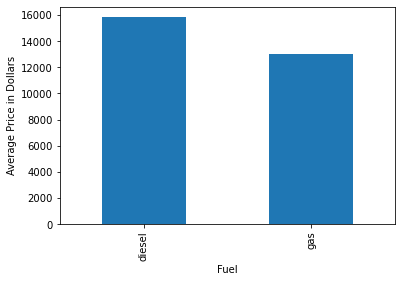

In [24]:
fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel")
plt1.set_ylabel("Average Price in Dollars")
plt.show()

Doornumber

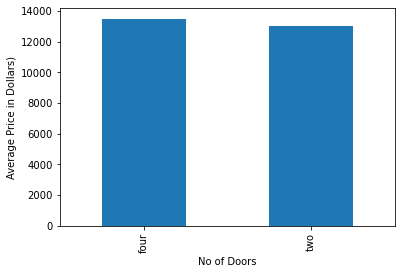

In [25]:
door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Average Price in Dollars)")
plt.show()

#### Aspiration

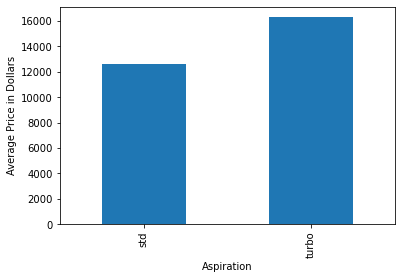

In [26]:
aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Average Price in Dollars")
plt.show()

#### Carbody 

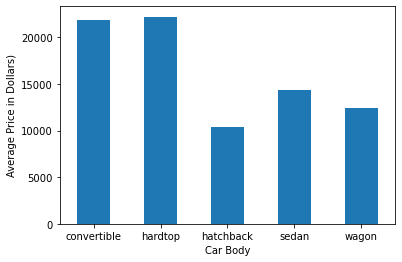

In [27]:
df_body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Average Price in Dollars)")
xticks(rotation = 0)
plt.show() 

#### Engine Type, Cylinder, Fuel System 

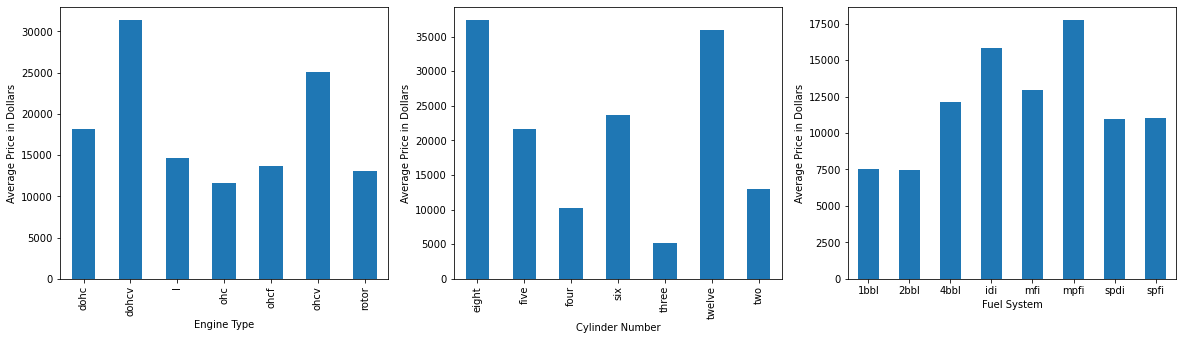

In [28]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Average Price in Dollars")
xticks(rotation = 0)
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Average Price in Dollars")
xticks(rotation = 0)
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Average Price in Dollars")
xticks(rotation = 0)
plt.show()

In [29]:
#A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

#### Mileage-price

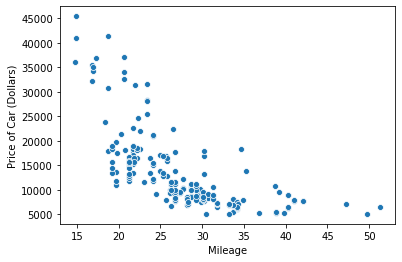

In [30]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

####  Wheelbase-Price

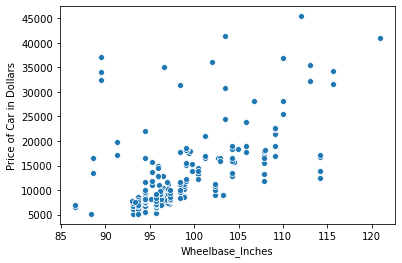

In [31]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase_Inches')
plt1.set_ylabel('Price of Car in Dollars')
plt.show()

#### Car Dimensions  

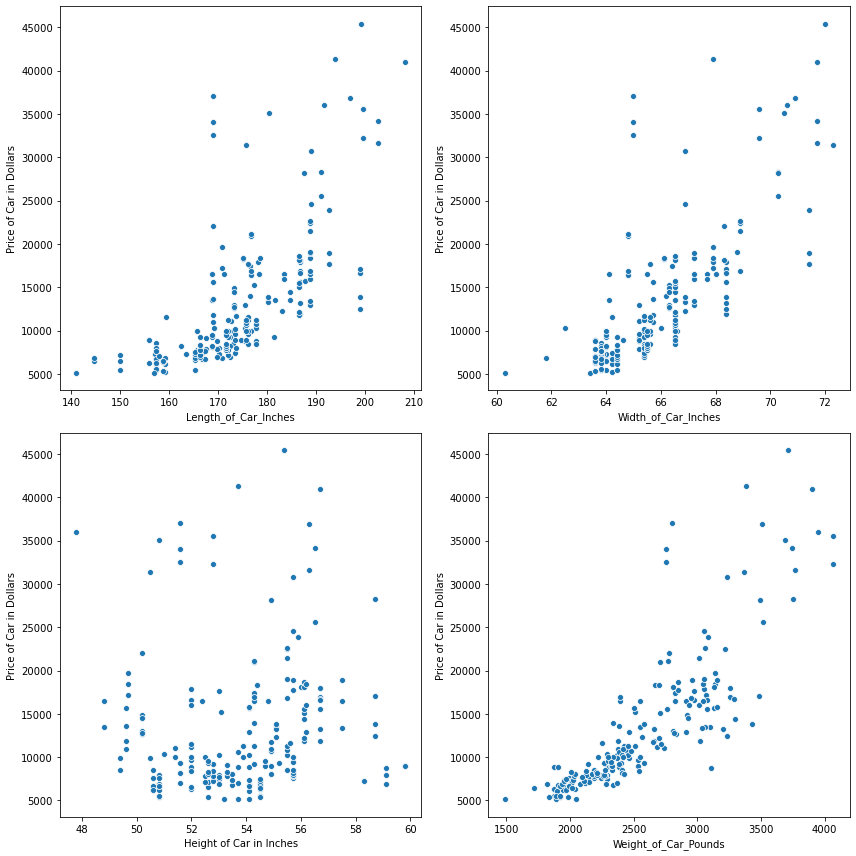

In [32]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length_of_Car_Inches')
plt1.set_ylabel('Price of Car in Dollars')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width_of_Car_Inches')
plt2.set_ylabel('Price of Car in Dollars')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car in Inches')
plt3.set_ylabel('Price of Car in Dollars')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight_of_Car_Pounds')
plt3.set_ylabel('Price of Car in Dollars')
plt.tight_layout()

#### Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio 

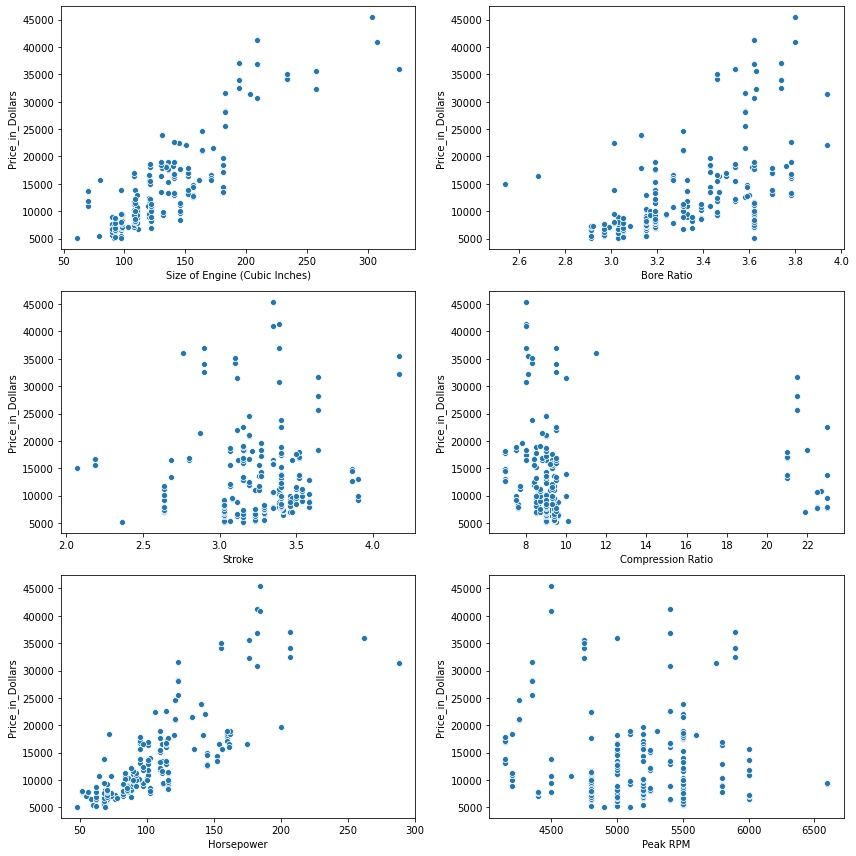

In [33]:
fig, axs = plt.subplots(3,2,figsize=(12,12))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price_in_Dollars')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price_in_Dollars')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price_in_Dollars')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price_in_Dollars')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price_in_Dollars')
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price_in_Dollars')
plt.tight_layout()
plt.show()

#### Enginesize-price  

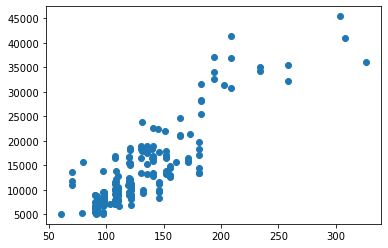

In [34]:
plt.scatter(x=df['enginesize'],y=df['price'])
plt.show()

## Bivariate Analysis

#### Brand Category - Mileage

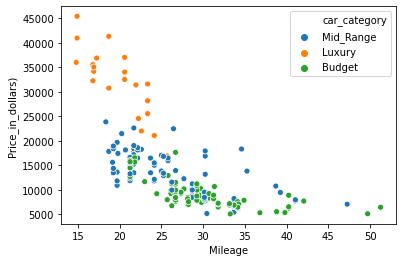

In [35]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'car_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price_in_dollars)')
plt.show()

#### Brand Category - Horsepower

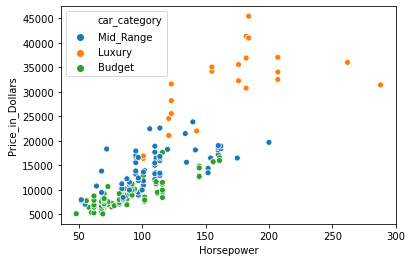

In [36]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'car_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price_in_Dollars')
plt.show()

#### Mileage - Fuel Type  

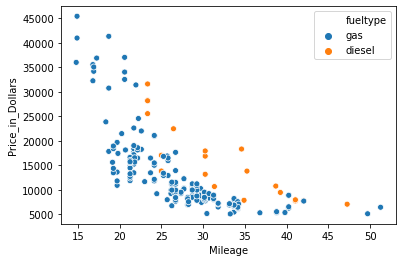

In [37]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price_in_Dollars')
plt.show()

#### Horsepower - Fuel Type  

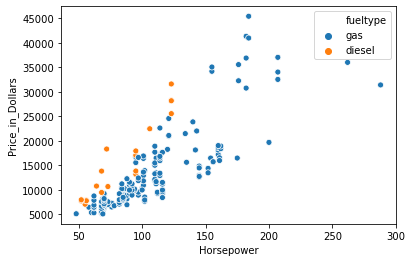

In [38]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price_in_Dollars')
plt.show()

In [45]:
data_new = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'car_category', 'mileage']]

In [46]:
data_new.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,car_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


<Figure size 864x864 with 0 Axes>

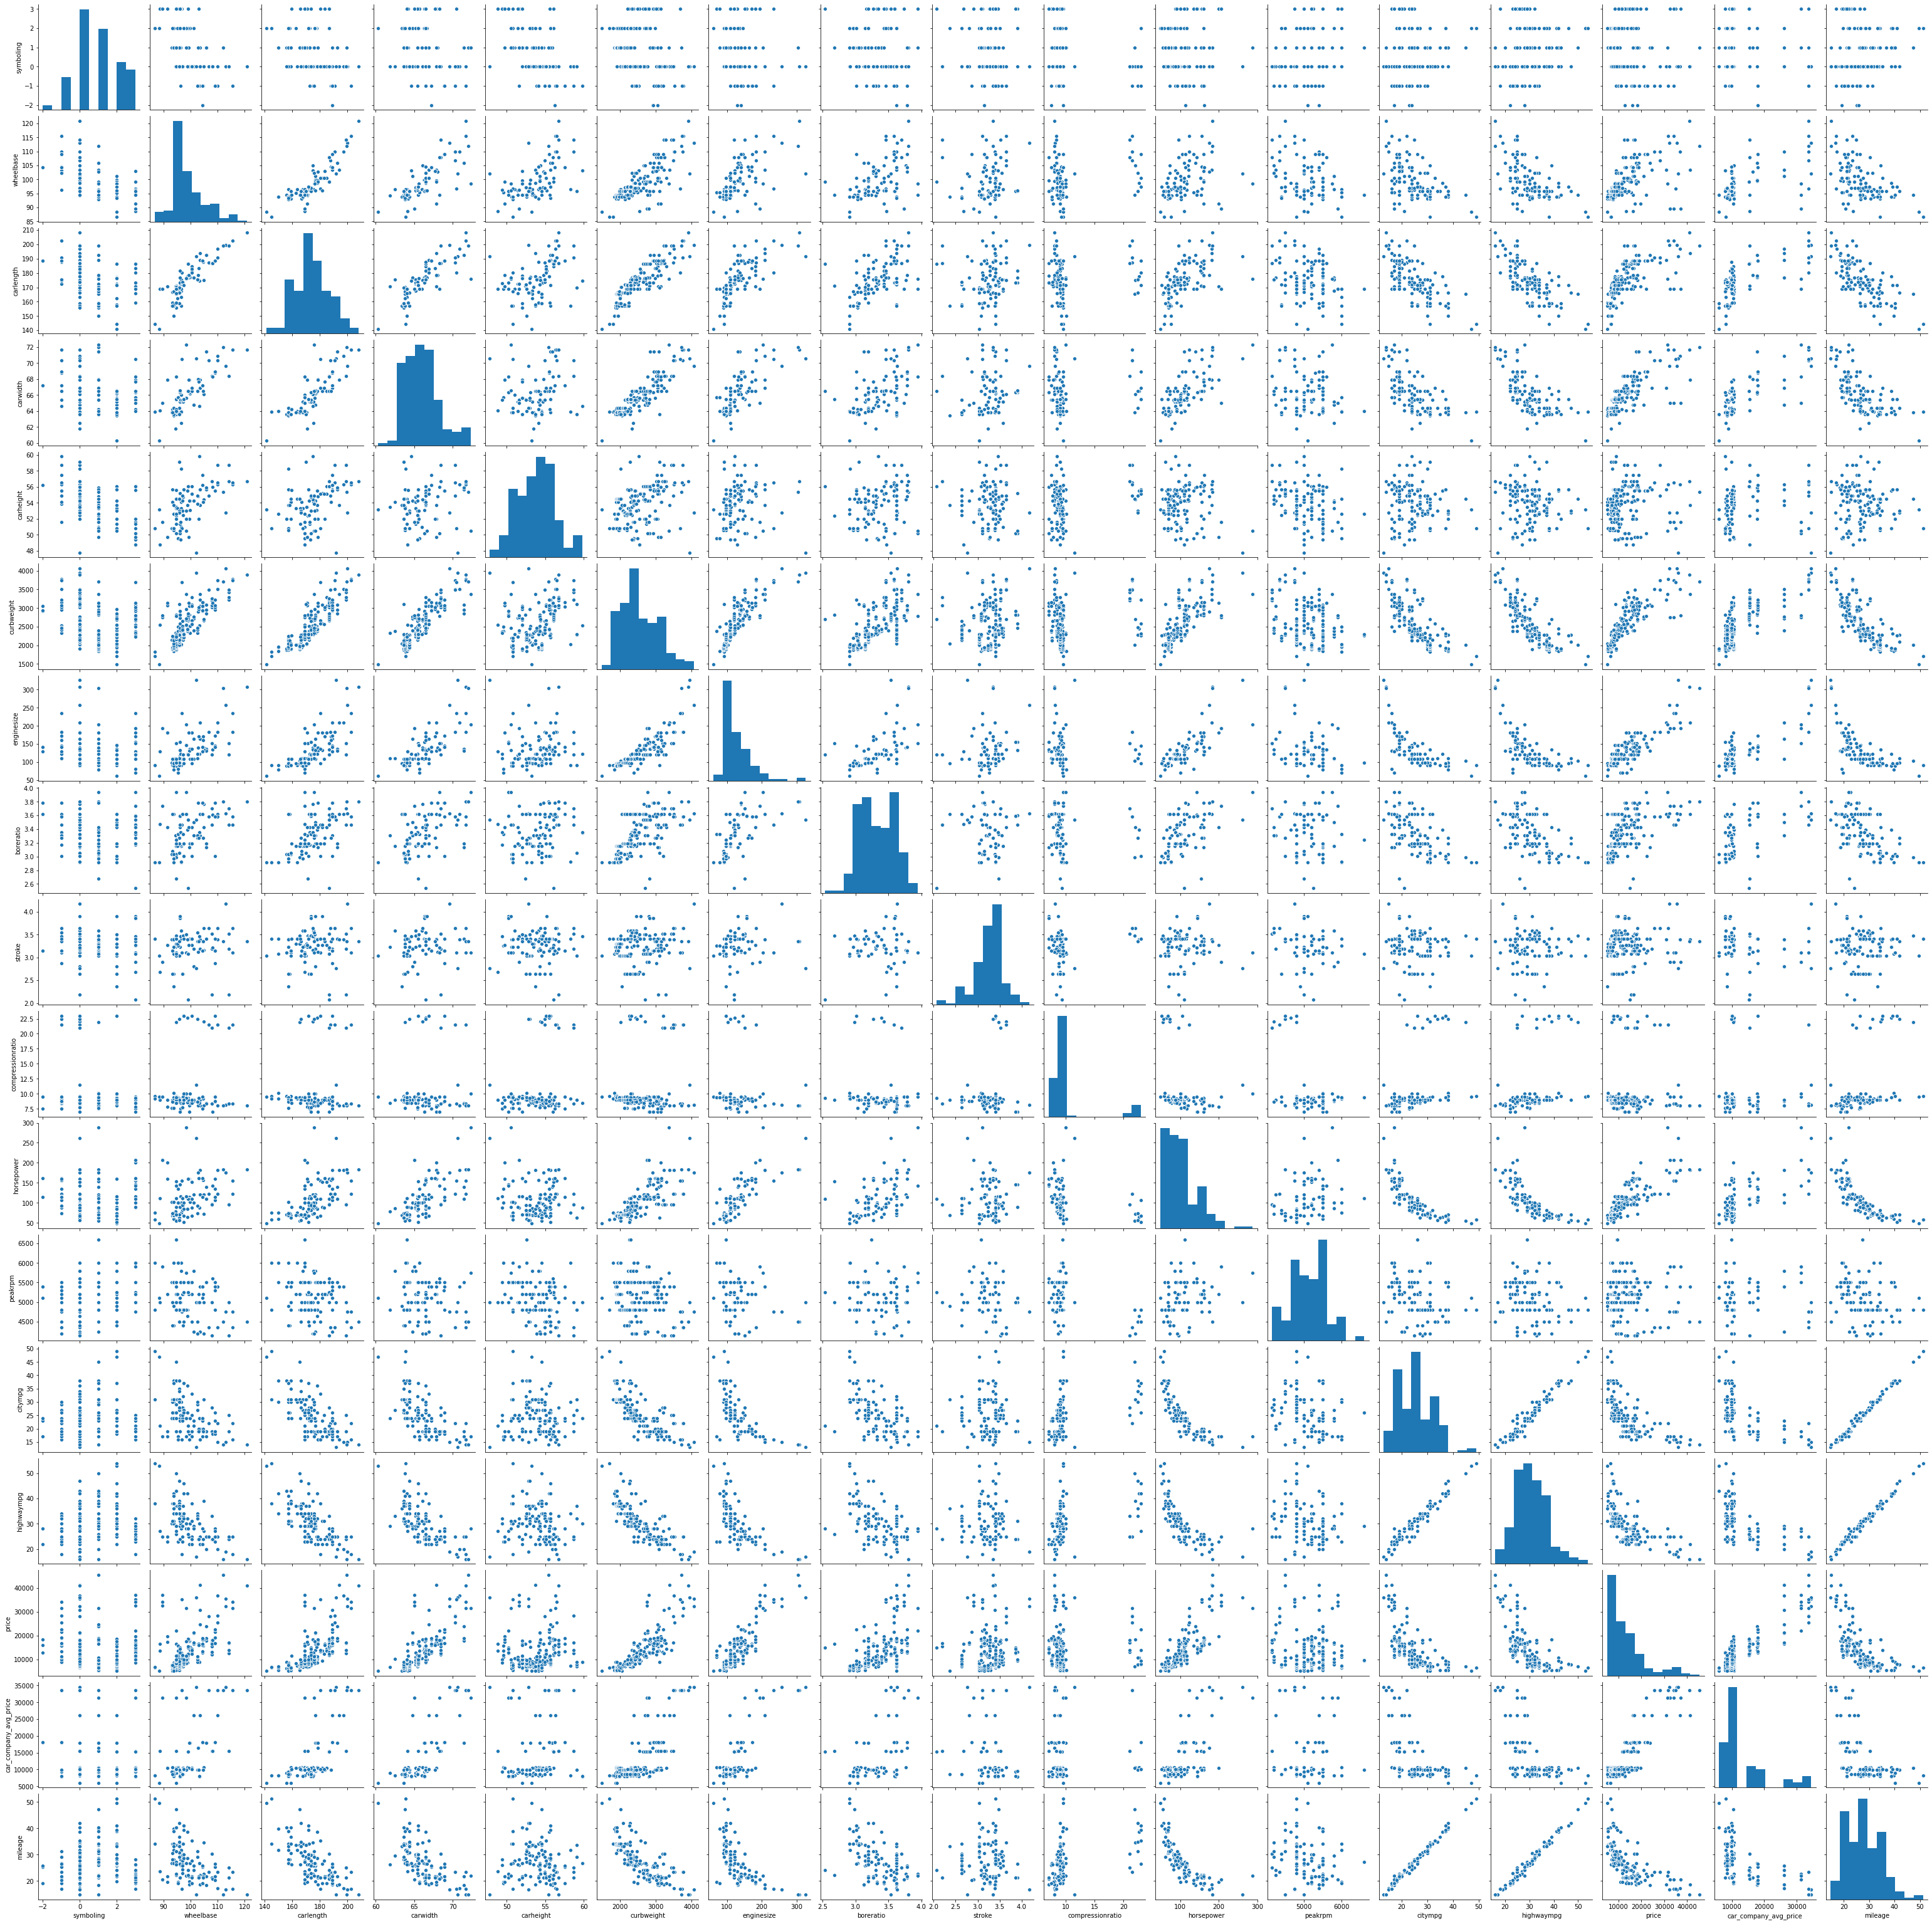

In [41]:
plt.figure(figsize=(15, 15))
sns.pairplot(df)
plt.show()

### Visualising Categorical Variables 

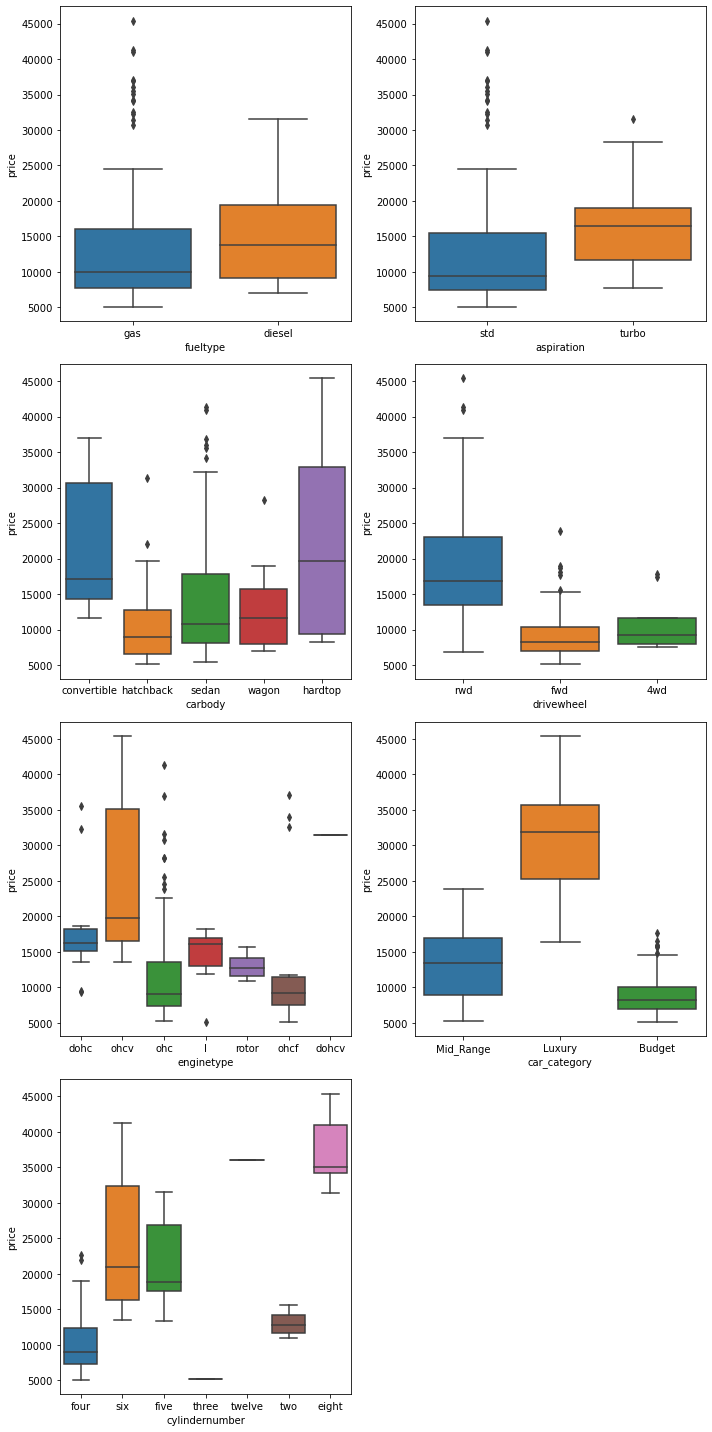

In [47]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data_new)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data =data_new)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data =data_new)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data =data_new)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data =data_new)
plt.subplot(4,2,6)
sns.boxplot(x = 'car_category', y = 'price', data = data_new)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data_new)
plt.tight_layout()
plt.show()

#### Dummy Variables 

In [48]:
cyl_no = pd.get_dummies(data_new['cylindernumber'], drop_first = True)
data_new = pd.concat([data_new, cyl_no], axis = 1)
brand_cat = pd.get_dummies(data_new['car_category'], drop_first = True)
data_new = pd.concat([data_new, brand_cat], axis = 1)
eng_typ = pd.get_dummies(data_new['enginetype'], drop_first = True)
data_new = pd.concat([data_new, eng_typ], axis = 1)
drwh = pd.get_dummies(data_new['drivewheel'], drop_first = True)
data_new = pd.concat([data_new, drwh], axis = 1)
carb = pd.get_dummies(data_new['carbody'], drop_first = True)
data_new = pd.concat([data_new, carb], axis = 1)
asp = pd.get_dummies(data_new['aspiration'], drop_first = True)
data_new = pd.concat([data_new, asp], axis = 1)
fuelt = pd.get_dummies(data_new['fueltype'], drop_first = True)
data_new= pd.concat([data_new, fuelt], axis = 1)

In [49]:
data_new.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 
           'enginetype', 'cylindernumber','car_category'], axis = 1, inplace = True)

In [50]:
data_new.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,0,0,1,0,0,1


## LINEAR REGRESSION 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_company',
       'car_company_avg_price', 'car_category', 'mileage'],
      dtype='object')

In [53]:
x=df['enginesize']
y=df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=31)
print(len(x.index))

205


In [54]:
x.head()

0    130
1    130
2    152
3    109
4    136
Name: enginesize, dtype: int64

In [55]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [58]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_train

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [60]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
print(lr.intercept_)
print(lr.coef_)

[-8008.74723113]
[[167.29904396]]


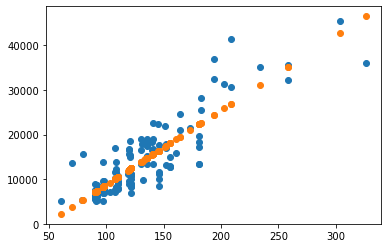

In [62]:
y_train_pred = lr.predict(x_train)
y_train_pred
plt.scatter(x = x_train, y = y_train)
plt.scatter(x= x_train, y = y_train_pred)
plt.show()

#### R2 score

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_train, y_train_pred)

0.7707390596714485

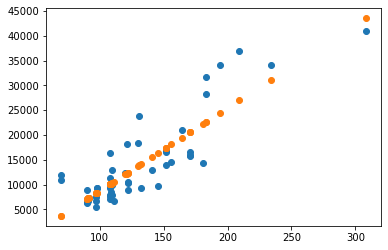

In [64]:
y_test_pred = lr.predict(x_test)

plt.scatter(x = x_test, y = y_test)
plt.scatter(x = x_test, y = y_test_pred)

plt.show()

In [65]:
r2_score(y_test,y_test_pred)

0.7454896900864271

## MODEL BUILDING

In [66]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']
df_train[numeric] = scaler.fit_transform(df_train[numeric])
print(df_train[numeric])

     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   
125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   
166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   
1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   
199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   
..         ...        ...       ...         ...         ...        ...   
87    0.334483   0.508943  0.425000    0.354926    0.184906   0.388889   
103   0.475862   0.707317  0.516667    0.609775    0.452830   0.595238   
67    0.806897   0.809756  0.833333    0.786268    0.460377   0.714286   
24    0.244828   0.263415  0.291667    0.185803    0.109434   0.230159   
8     0.662069   0.839024  0.925000    0.619860    0.264151   0.357143   

     horsepower     price   mileage  
122    0.083333  0.068818  0.530864  
125    0.395833  0.466890  0.213992

In [68]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


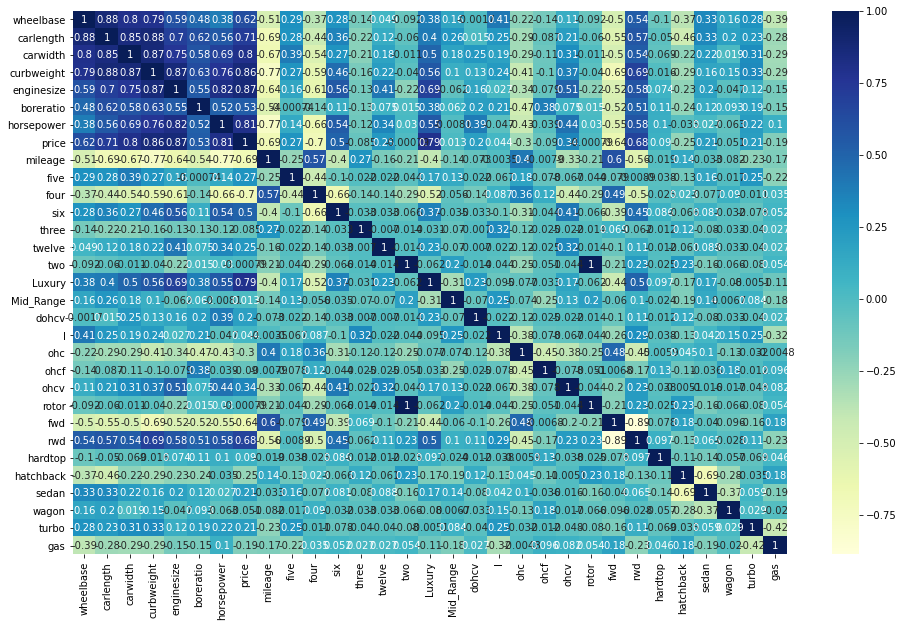

In [69]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
# The correlation coefficients whose variables are highly correlated

## Dividing into X and Y sets for the model building 

In [70]:
y_train = df_train.pop('price')
x_train = df_train

In [72]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [73]:
multi_model = LinearRegression()
multi_model.fit(x_train, y_train)
rfe = RFE(multi_model, 10)          
rfe = rfe.fit(x_train, y_train)

In [74]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [75]:
x_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [76]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,carwidth,curbweight,horsepower,mileage,twelve,Luxury,dohcv,hatchback,sedan,wagon
122,0.291667,0.272692,0.083333,0.530864,0,0,0,0,1,0
125,0.666667,0.500388,0.395833,0.213992,0,1,0,1,0,0
166,0.308333,0.314973,0.266667,0.344307,0,0,0,1,0,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.122085,0,0,0,0,0,1


In [77]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [78]:
# Creating X_test dataframe with RFE selected variables
rfe_x_train = x_train[col]

In [79]:
def build_mlr_model(x,y):
    x = sm.add_constant(x)
    lm = sm.OLS(y_train,rfe_x_train).fit() 
    print(lm.summary())
    return x

In [80]:
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [81]:
x_train1 = build_mlr_model(rfe_x_train,y_train)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              353.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):                    1.21e-90
Time:                        08:29:36   Log-Likelihood:                          203.17
No. Observations:                 143   AIC:                                     -386.3
Df Residuals:                     133   BIC:                                     -356.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
#We will have to drop curbweight as p-value is high.
x_train1 = rfe_x_train.drop(["twelve"], axis = 1)
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train1)
lm = sm.OLS(y_train,x_train_lm).fit()   
# Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           4.25e-71
Time:                        08:32:11   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

In [84]:
# Dropping hardtop as p value is high.
x_train2 = x_train1.drop(["mileage"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train2)
lm = sm.OLS(y_train,x_train_lm).fit() 
#Running the linear model
#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           7.86e-72
Time:                        08:33:12   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.51
0,carwidth,36.09
2,horsepower,10.32
6,sedan,4.69
5,hatchback,2.95
7,wagon,2.10
3,Luxury,1.85
4,dohcv,1.44


In [86]:
# we will have to Drop mileage as p-value is high.
x_train3 = x_train2.drop(["curbweight"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train3)
lm = sm.OLS(y_train,x_train_lm).fit()
# Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           4.70e-70
Time:                        08:36:17   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,14.94
1,horsepower,7.15
5,sedan,4.65
4,hatchback,2.78
6,wagon,1.99
2,Luxury,1.76
3,dohcv,1.19


In [88]:
# We will have to drop sedan as VIF value is high.
x_train4 = x_train3.drop(["sedan"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train4)
lm = sm.OLS(y_train,x_train_lm).fit()   
# Running the linear model
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.68e-69
Time:                        08:38:15   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [89]:
#We will have to drop wagon as p value is high.
x_train5 = x_train4.drop(["wagon"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train5)
lm = sm.OLS(y_train,x_train_lm).fit()   
# Running the linear model
#summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.57e-70
Time:                        08:39:45   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [90]:
# VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = x_train5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,6.90
0,carwidth,5.81
2,Luxury,1.66
4,hatchback,1.40
3,dohcv,1.18


In [91]:
# lets drop dohcv and see if theres is any change in the model.
x_train6 = x_train5.drop(["dohcv"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train6)
lm = sm.OLS(y_train,x_train_lm).fit()  
# Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):           1.04e-67
Time:                        08:42:38   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [92]:
y_train_price = lm.predict(x_train_lm)

In [93]:
numeric = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']
df_test[numeric] = scaler.transform(df_test[numeric])

In [94]:
y_test = df_test.pop('price')
x_test = df_test

In [95]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [96]:
#predictions
y_pred = lm.predict(x_test_new)

#### R2-SCORE 

In [97]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302792

Text(0, 0.5, 'y_pred')

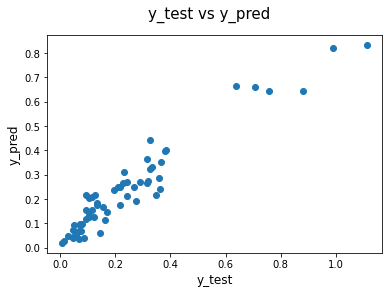

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)# Plot heading 
plt.xlabel('y_test', fontsize=12) # X-label
plt.ylabel('y_pred', fontsize=12) 